Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

     no rain       1.00      1.00      1.00       437
        rain       1.00      1.00      1.00        63

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Predicted Weather Outcome: no rain ,for given weather input


C:\Users\oosun\AppData\Local\Temp\ipykernel_19656\1312413857.py:32: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_input = df_input.apply(pd.to_numeric, errors='ignore')


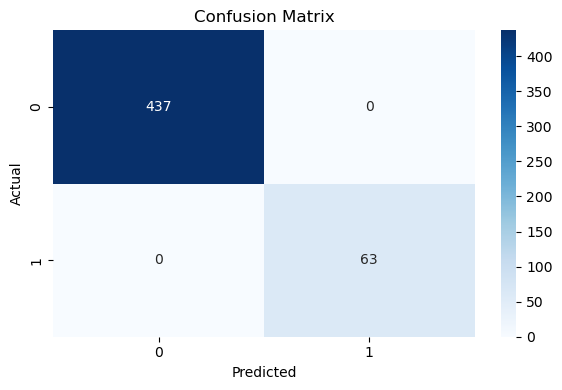

In [1]:
import pandas as pd
import pickle
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#Step 1: Loading the saved model and scaler from pkl files
with open("../Artifacts/randomforest_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

#Step 2: Loading the test dataset
df_test = pd.read_csv('../Data/test_data.csv', delimiter=",")

#Step 3: Preparing the test data
X_test = df_test.drop(columns=["Rain"])
y_test = df_test['Rain']

#Step 5: Make predictions of entire dataset 
predictions = loaded_model.predict(X_test)

#Prediction function for the given input test
def predict_weather(input_string):
    columns = ["Temperature", "Humidity", "Wind_Speed", "Cloud_Cover", "Pressure"]

    # Convert input string into a list
    input_data = input_string.split(",")

    # Convert to DataFrame
    df_input = pd.DataFrame([input_data], columns=columns)

    # Convert numerical values from strings to floats
    df_input = df_input.apply(pd.to_numeric, errors='ignore') 

    # Predict using the loaded model
    prediction = loaded_model.predict(df_input)

    # Rain map
    rain_map = {0: "no rain", 1: "rain"}
    predicted_rain = rain_map[prediction[0]]

    return predicted_rain

#Step 6: Evaluate predictions
print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions, target_names=["no rain", "rain"]))

#Example testing input from the csv file
weather_input = "20.5,65,13.2,60,1012" 

#Print predicted grade
print(f"Predicted Weather Outcome: {predict_weather(weather_input)} ,for given weather input")

#Confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()